# Multilayer perceptron on Adult

## Imports

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading data & printing shapes

In [65]:
import pandas as pd
from sklearn import preprocessing,cross_validation,neighbors
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Data Traitement

In [66]:
#create matrix X and target vector y
columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
temp1=df['workclass']
labels, uniques=pd.factorize(temp1)
X0=np.array(labels) #workclass

temp1=df['educational-num']
labels, uniques=pd.factorize(temp1)
X1=np.array(labels) #educational-num

temp1=df['marital-status']
labels, uniques=pd.factorize(temp1)
X2=np.array(labels) #marital-status

temp1=df['occupation']
labels, uniques=pd.factorize(temp1)
X3=np.array(labels) #occupation

temp1=df['relationship']
labels, uniques=pd.factorize(temp1)
X4=np.array(labels) #relationship

temp1=df['race']
labels, uniques=pd.factorize(temp1)
X5=np.array(labels) #race

temp1=df['gender']
labels, uniques=pd.factorize(temp1)
X6=np.array(labels) #gender

temp1=df['native-country']
labels, uniques=pd.factorize(temp1)
X7=np.array(labels) #native-country

y = df['income']
X = df[columns]
n,m = X.shape 
print(X.shape)
X0=X0.reshape(n,1)
X1=X1.reshape(n,1)
X2=X2.reshape(n,1)
X3=X3.reshape(n,1)
X4=X4.reshape(n,1)
X5=X5.reshape(n,1)
X6=X6.reshape(n,1)
X7=X7.reshape(n,1)

X=np.hstack((X,X0))
X=np.hstack((X,X1))
X=np.hstack((X,X2))
X=np.hstack((X,X3))
X=np.hstack((X,X4))
X=np.hstack((X,X5))
X=np.hstack((X,X6))
X=np.hstack((X,X7))
print(X)

(48842, 6)
[[    25 226802      7 ...      0      0      0]
 [    38  89814      9 ...      1      0      0]
 [    28 336951     12 ...      1      0      0]
 ...
 [    58 151910      9 ...      1      1      0]
 [    22 201490      9 ...      1      0      0]
 [    52 287927      9 ...      1      1      0]]


In [67]:
labels, uniques=pd.factorize(y)
y=np.array(labels)
print(y)


[0 0 1 ... 0 0 1]


In [68]:
from sklearn import preprocessing,cross_validation,neighbors
import pandas as pd
#split into train and test
split = 0.2
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=split,random_state=21)

## PCA

In [78]:
from sklearn.decomposition import PCA
COMPONENT_NUM = 3
train_label = y_train
train_data = X_train
test_label=y_test
test_data=X_test
print('Reduction...')
pca = PCA(n_components=COMPONENT_NUM, whiten=True)
pca.fit(train_data)
train_data = pca.transform(train_data)
X_train=train_data
pca.fit(test_data)
test_data = pca.transform(test_data)
X_test=test_data


Reduction...


In [79]:
#Generate plot
def graph(label1):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.title('MLN')
    plt.plot(a_epochs, a_loss, label=label1)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Training set score')
    plt.show()

In [80]:
epochs=[10,20,30,40,50]
m_batches=[200,250,300,350]

In [81]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
a_loss=[]
a_epochs=[]
a_batches=[]
for j in m_batches:
    for epoch in epochs:
        mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=epoch, alpha=1e-4,
                            solver='sgd', tol=1e-4, random_state=3,
                            learning_rate_init=0.001,batch_size=j)

        mlp.fit(X_train, y_train)
        print("Mini-batch: %d - Epoch: %d - Training set score: %f" % (j,epoch,mlp.score(X_train, y_train)))
        print("Mini-batch: %d - Epoch: %d - Test set score: %f" % (j,epoch,mlp.score(X_test, y_test)))
        a_loss.append(mlp.score(X_test, y_test))
        a_epochs.append(epoch)
        a_batches.append(j)
        print(a_loss)
        print(a_epochs)
        print(a_batches)


/home/paolo/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mini-batch: 200 - Epoch: 10 - Training set score: 0.771914
Mini-batch: 200 - Epoch: 10 - Test set score: 0.767018
[0.7670181185382332]
[10]
[200]


/home/paolo/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mini-batch: 200 - Epoch: 20 - Training set score: 0.796970
Mini-batch: 200 - Epoch: 20 - Test set score: 0.793838
[0.7670181185382332, 0.7938376497082609]
[10, 20]
[200, 200]


/home/paolo/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mini-batch: 200 - Epoch: 30 - Training set score: 0.798480
Mini-batch: 200 - Epoch: 30 - Test set score: 0.801822
[0.7670181185382332, 0.7938376497082609, 0.8018220902855973]
[10, 20, 30]
[200, 200, 200]


/home/paolo/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mini-batch: 200 - Epoch: 40 - Training set score: 0.800450
Mini-batch: 200 - Epoch: 40 - Test set score: 0.805610
[0.7670181185382332, 0.7938376497082609, 0.8018220902855973, 0.8056095813286928]
[10, 20, 30, 40]
[200, 200, 200, 200]


/home/paolo/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mini-batch: 200 - Epoch: 50 - Training set score: 0.799939
Mini-batch: 200 - Epoch: 50 - Test set score: 0.806736
[0.7670181185382332, 0.7938376497082609, 0.8018220902855973, 0.8056095813286928, 0.8067355921793428]
[10, 20, 30, 40, 50]
[200, 200, 200, 200, 200]
Mini-batch: 250 - Epoch: 10 - Training set score: 0.767717
Mini-batch: 250 - Epoch: 10 - Test set score: 0.765687
[0.7670181185382332, 0.7938376497082609, 0.8018220902855973, 0.8056095813286928, 0.8067355921793428, 0.7656873784420104]
[10, 20, 30, 40, 50, 10]
[200, 200, 200, 200, 200, 250]
Mini-batch: 250 - Epoch: 20 - Training set score: 0.786425
Mini-batch: 250 - Epoch: 20 - Test set score: 0.783806
[0.7670181185382332, 0.7938376497082609, 0.8018220902855973, 0.8056095813286928, 0.8067355921793428, 0.7656873784420104, 0.7838059166751971]
[10, 20, 30, 40, 50, 10, 20]
[200, 200, 200, 200, 200, 250, 250]
Mini-batch: 250 - Epoch: 30 - Training set score: 0.799171
Mini-batch: 250 - Epoch: 30 - Test set score: 0.799263
[0.7670181185

[10, 20, 30, 40, 50]
[0.7670181185382332, 0.7938376497082609, 0.8018220902855973, 0.8056095813286928, 0.8067355921793428, 0.7656873784420104, 0.7838059166751971, 0.7992629747159382, 0.8028457365134609, 0.8060190398198382, 0.7654826491964377, 0.7803255195004607, 0.7939400143310472, 0.80090080868052, 0.8029481011362473, 0.7642542737230014, 0.7743883713788514, 0.7856484798853516, 0.7989558808475791, 0.8016173610400246]


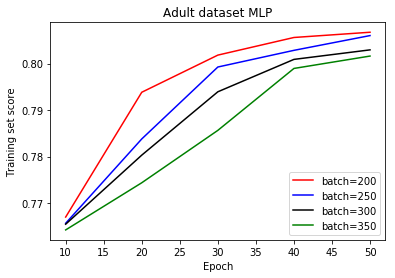

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
print(a_epochs[:5])
print(a_loss)
plt.title('Adult dataset MLP')
plt.plot(a_epochs[:5], a_loss[:5],'red', label="batch=200")
plt.plot(a_epochs[:5], a_loss[5:10],'blue', label="batch=250")
plt.plot(a_epochs[:5], a_loss[10:15],'black', label="batch=300")
plt.plot(a_epochs[:5], a_loss[15:],'green', label="batch=350")


plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Training set score')
plt.show()

In [87]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50, alpha=1e-4,
                            solver='sgd', tol=1e-4, random_state=3,
                            learning_rate_init=0.001,batch_size=200)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)
y_pred=mlp.predict(X_test)

/home/paolo/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [88]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.8067355921793428
